In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from pandasql import sqldf

%matplotlib inline
#test

In [2]:
articles = pd.read_csv('articles.csv')
articles.head()

FileNotFoundError: [Errno 2] No such file or directory: 'articles.csv'

In [3]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    return pd.concat([total], axis=1, keys=['Total'])

In [4]:
missing_data(articles)

,Total
detail_desc,416
perceived_colour_master_name,0
garment_group_name,0
garment_group_no,0
section_name,0
section_no,0
index_group_name,0
index_group_no,0
index_name,0
index_code,0


In [5]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [6]:
unique_values(articles).sort_values('Uniques', ascending = False)

,Total,Uniques
article_id,105542,105542
product_code,105542,47224
prod_name,105542,45875
detail_desc,105126,43404
department_no,105542,299
department_name,105542,250
product_type_no,105542,132
product_type_name,105542,131
section_no,105542,57
section_name,105542,56


Different number of unique values
- product_code and prod_name
- product_type_no and product_type_name
- department_no and department_name
- section_no and section_name

We might have some categories which have the same name. Hence, we observe different number of unique values
 

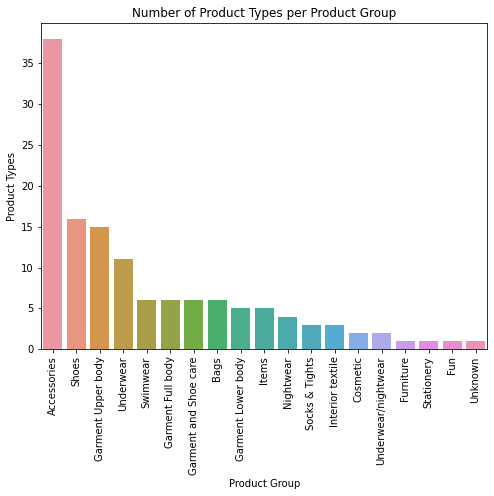

In [7]:
tpg = articles.groupby(['product_group_name'])['product_type_name'].nunique()
df_tpg = pd.DataFrame({'Product Group': tpg.index,
                   'Product Types': tpg.values
                  })
df_tpg = df_tpg.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y='Product Types', data=df_tpg)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.savefig('prodtype-prodgrp.jpeg')
plt.show()

In [8]:
df_tpg

,Product Group,Product Types
0,Accessories,38
12,Shoes,16
7,Garment Upper body,15
16,Underwear,11
15,Swimwear,6
5,Garment Full body,6
8,Garment and Shoe care,6
1,Bags,6
6,Garment Lower body,5
10,Items,5


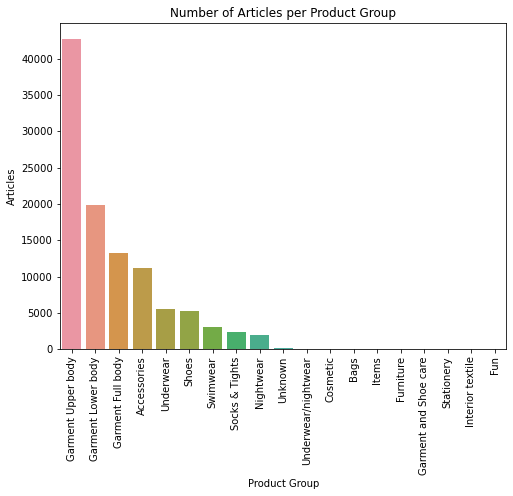

In [8]:
apg = articles.groupby(['product_group_name'])['article_id'].nunique()
df_apg = pd.DataFrame({'Product Group': apg.index,
                   'Articles': apg.values
                  })
df_apg = df_apg.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles per Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y='Articles', data=df_apg)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [10]:
df_apg

,Product Group,Articles
7,Garment Upper body,42741
6,Garment Lower body,19812
5,Garment Full body,13292
0,Accessories,11158
16,Underwear,5490
12,Shoes,5283
15,Swimwear,3127
13,Socks & Tights,2442
11,Nightwear,1899
18,Unknown,121


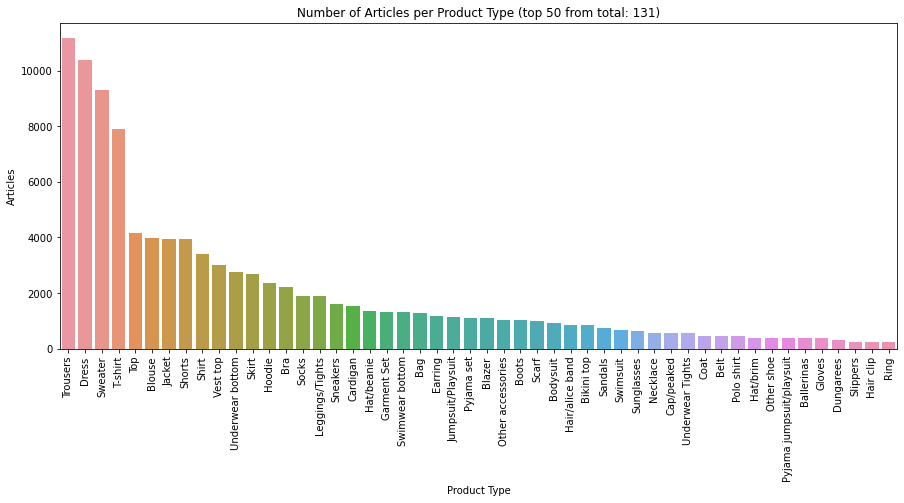

In [9]:
apt = articles.groupby(['product_type_name'])['article_id'].nunique()
df_apt = pd.DataFrame({'Product Type': apt.index,
                   'Articles': apt.values
                  })
top = 50
total_types = len(df_apt['Product Type'].unique())
df_apt = df_apt.sort_values(['Articles'], ascending=False)[0:top]
plt.figure(figsize = (15,6))
plt.title(f'Number of Articles per Product Type (top {top} from total: {total_types})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y='Articles', data=df_apt)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [12]:
df_apt

,Product Type,Articles
112,Trousers,11169
32,Dress,10362
100,Sweater,9302
105,T-shirt,7904
108,Top,4155
11,Blouse,3979
56,Jacket,3940
87,Shorts,3939
86,Shirt,3405
121,Vest top,2991


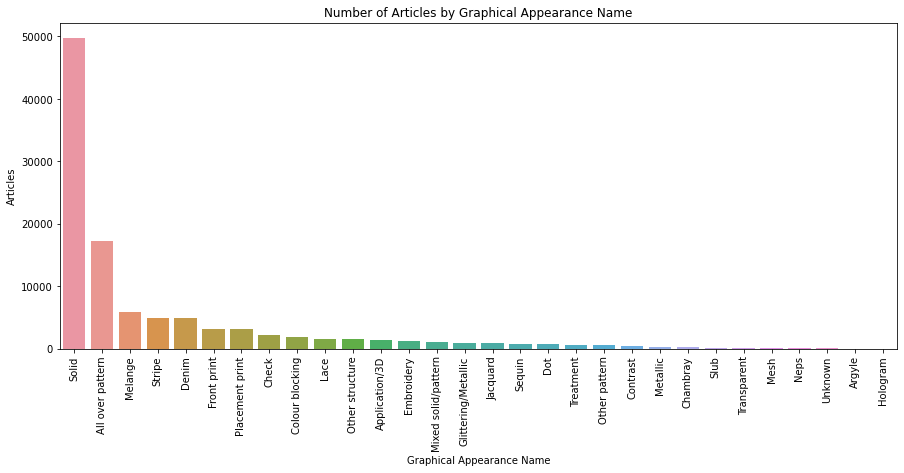

In [10]:
apa = articles.groupby(['graphical_appearance_name'])['article_id'].nunique()
df_apa = pd.DataFrame({'Graphical Appearance Name': apa.index,
                   'Articles': apa.values
                  })
df_apa = df_apa.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (15,6))
plt.title('Number of Articles by Graphical Appearance Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Graphical Appearance Name', y='Articles', data=df_apa)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [14]:
df_apa

,Graphical Appearance Name,Articles
25,Solid,49747
0,All over pattern,17165
15,Melange,5938
26,Stripe,4990
7,Denim,4842
10,Front print,3215
22,Placement print,3098
4,Check,2178
5,Colour blocking,1830
14,Lace,1513


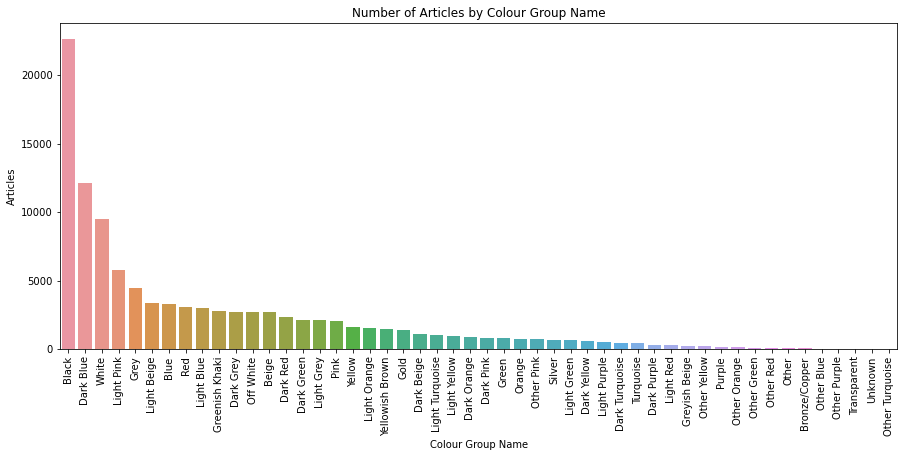

In [11]:
apc = articles.groupby(['colour_group_name'])['article_id'].nunique()
df_apc = pd.DataFrame({'Colour Group Name': apc.index,
                   'Articles': apc.values
                  })
df_apc = df_apc.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (15,6))
plt.title('Number of Articles by Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Colour Group Name', y='Articles', data=df_apc)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [16]:
df_apc

,Colour Group Name,Articles
1,Black,22670
5,Dark Blue,12171
47,White,9542
24,Light Pink,5811
17,Grey,4487
19,Light Beige,3356
2,Blue,3308
42,Red,3056
20,Light Blue,3012
16,Greenish Khaki,2767


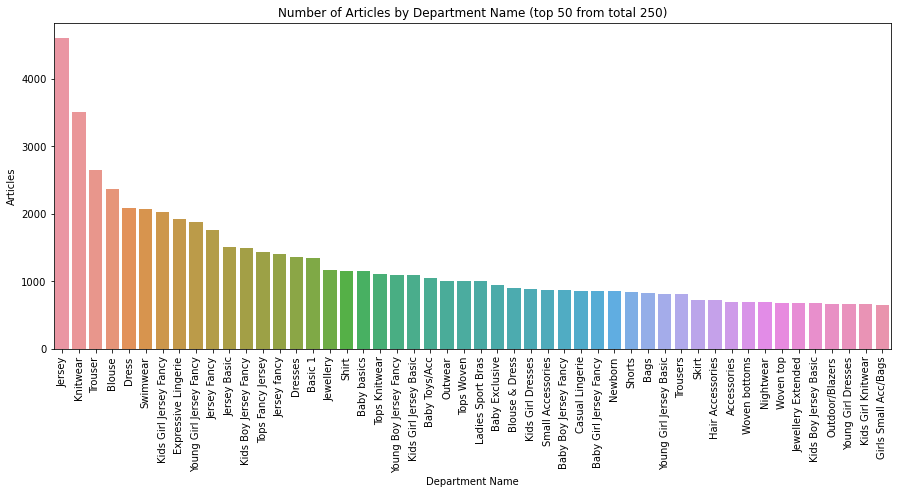

In [17]:
apd = articles.groupby(['department_name'])['article_id'].nunique()
df_apd = pd.DataFrame({'Department Name': apd.index,
                   'Articles': apd.values
                  })
top = 50
total_dept = len(df_apd['Department Name'].unique())
df_apd = df_apd.sort_values(['Articles'], ascending=False)[:top]
plt.figure(figsize = (15,6))
plt.title(f'Number of Articles by Department Name (top {top} from total {total_dept})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Department Name', y='Articles', data=df_apd)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [18]:
df_apd

,Department Name,Articles
81,Jersey,4604
124,Knitwear,3503
208,Trouser,2655
33,Blouse,2362
54,Dress,2087
195,Swimwear,2075
114,Kids Girl Jersey Fancy,2032
66,Expressive Lingerie,1921
241,Young Girl Jersey Fancy,1874
83,Jersey Fancy,1754


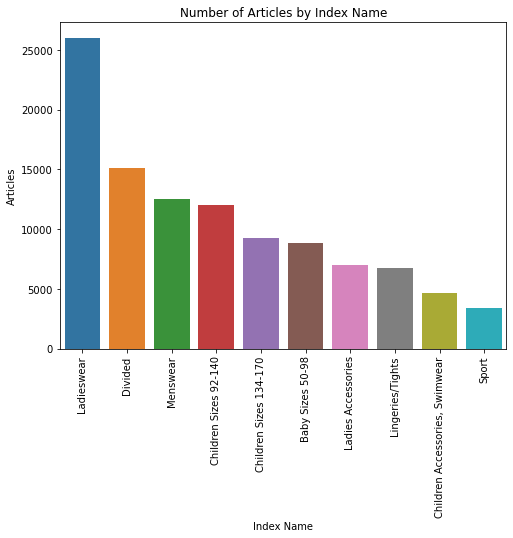

In [19]:
api = articles.groupby(['index_name'])['article_id'].nunique()
df_api = pd.DataFrame({'Index Name': api.index,
                   'Articles': api.values
                  })
df_api = df_api.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles by Index Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Name', y='Articles', data=df_api)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [20]:
df_api

,Index Name,Articles
6,Ladieswear,26001
4,Divided,15149
8,Menswear,12553
3,Children Sizes 92-140,12007
2,Children Sizes 134-170,9214
0,Baby Sizes 50-98,8875
5,Ladies Accessories,6961
7,Lingeries/Tights,6775
1,"Children Accessories, Swimwear",4615
9,Sport,3392


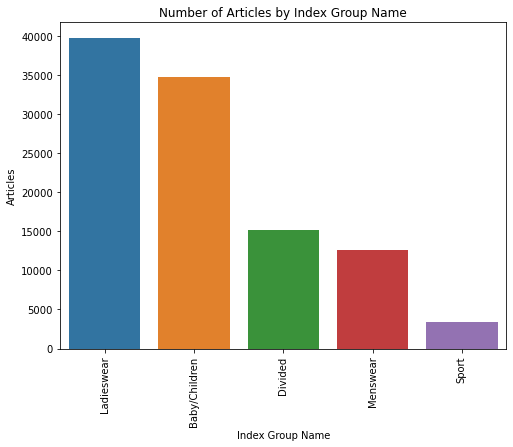

In [21]:
apig = articles.groupby(['index_group_name'])['article_id'].nunique()
df_apig = pd.DataFrame({'Index Group Name': apig.index,
                   'Articles': apig.values
                  })
df_apig = df_apig.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles by Index Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Group Name', y='Articles', data=df_apig)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [22]:
df_apig

,Index Group Name,Articles
2,Ladieswear,39737
0,Baby/Children,34711
1,Divided,15149
3,Menswear,12553
4,Sport,3392


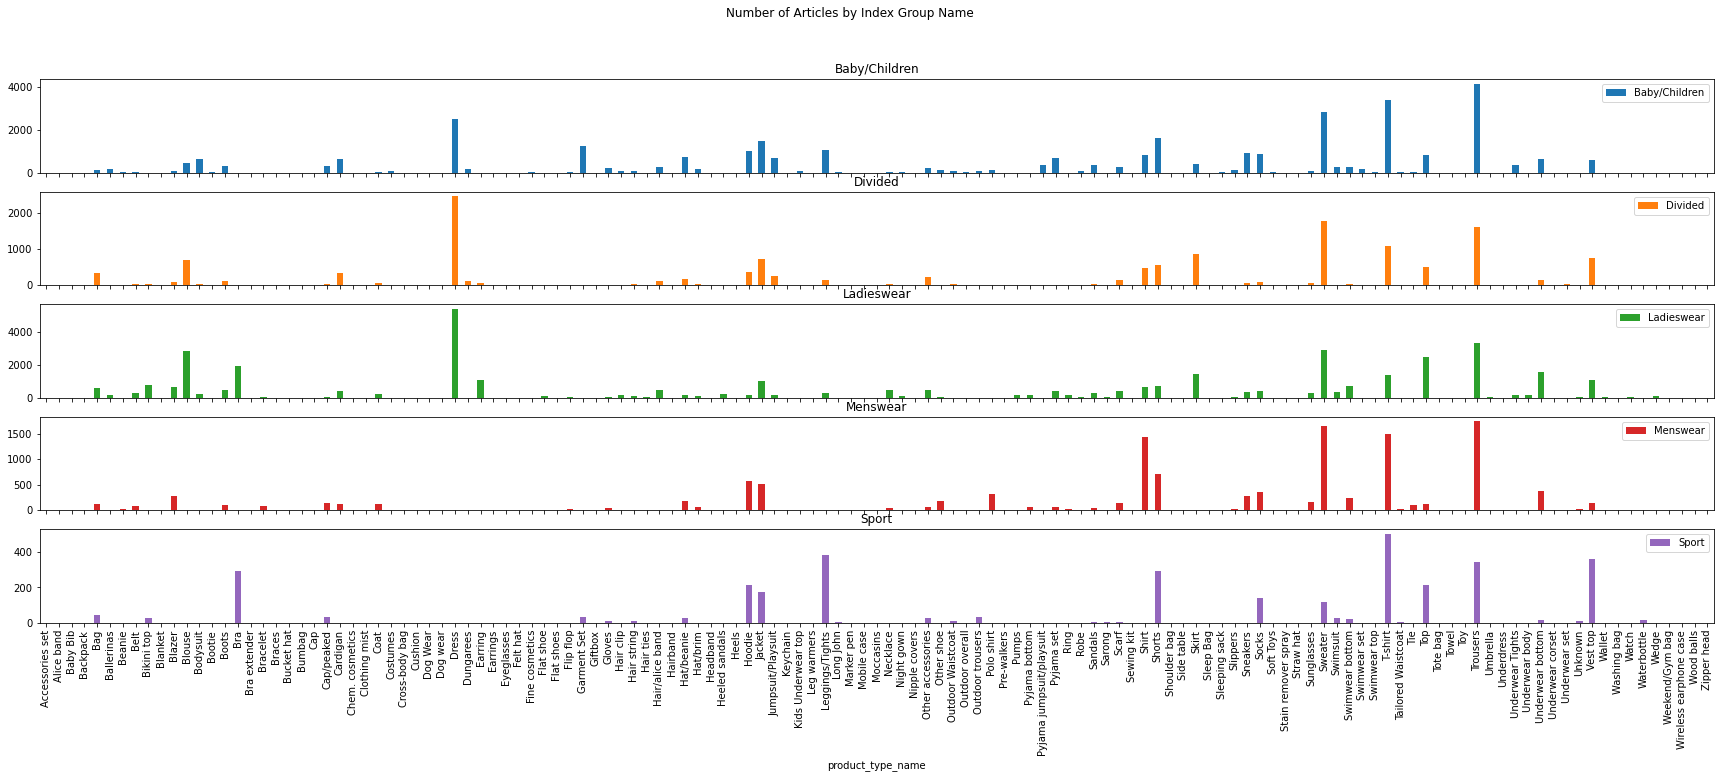

In [23]:
apig = articles.groupby(['index_group_name', 'product_type_name'])['article_id'].nunique()

#df_apig = df_apig.sort_values(['Articles'], ascending=False)
#plt.figure(figsize = (8,6))
#plt.title('Number of Articles by Index Group Name')
#sns.set_color_codes("pastel")
#s = sns.barplot(x = ('Index Group Name', 'Product Type Name'), y='Articles', data=df_apig)
#s.set_xticklabels(s.get_xticklabels(),rotation=90)
#locs, labels = plt.xticks()
#plt.show(), 
ax = apig.unstack(level=0).plot(kind = 'bar', subplots = True, figsize = (30,10),
                                title= 'Number of Articles by Index Group Name')
#plt.tight_layout()
plt.show()

In [24]:
apig

index_group_name  product_type_name
Baby/Children     Accessories set        7
                  Alice band             1
                  Baby Bib               3
                  Backpack               1
                  Bag                  135
                                      ... 
Sport             Trousers             344
                  Underwear bottom      13
                  Unknown               11
                  Vest top             361
                  Waterbottle           16
Name: article_id, Length: 365, dtype: int64

<AxesSubplot:xlabel='index_group_name,product_type_name'>

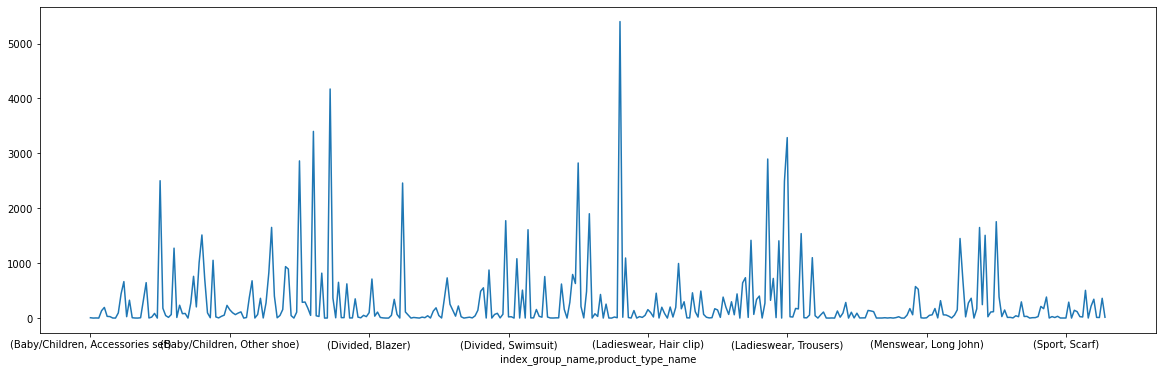

In [25]:
apig.plot(figsize = (20,6))

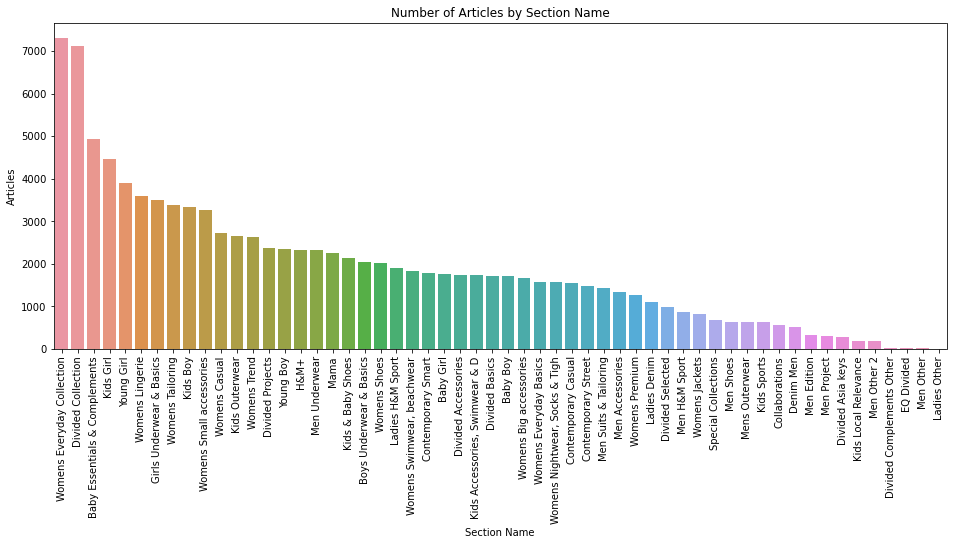

In [26]:
aps = articles.groupby(['section_name'])['article_id'].nunique()
df_aps = pd.DataFrame({'Section Name': aps.index,
                   'Articles': aps.values
                  })
df_aps = df_aps.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (16,6))
plt.title('Number of Articles by Section Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Section Name', y='Articles', data=df_aps)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [27]:
df_aps

,Section Name,Articles
44,Womens Everyday Collection,7295
12,Divided Collection,7124
1,Baby Essentials & Complements,4932
22,Kids Girl,4469
55,Young Girl,3899
46,Womens Lingerie,3598
17,Girls Underwear & Basics,3490
52,Womens Tailoring,3376
21,Kids Boy,3328
50,Womens Small accessories,3270


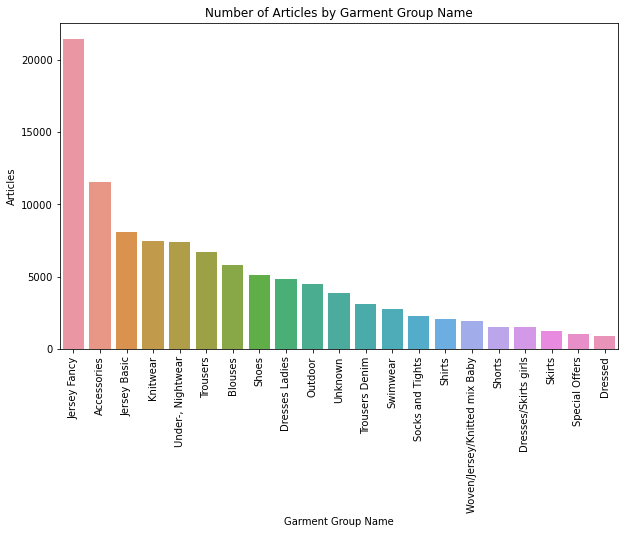

In [28]:
apgg = articles.groupby(['garment_group_name'])['article_id'].nunique()
df_apgg = pd.DataFrame({'Garment Group Name': apgg.index,
                   'Articles': apgg.values
                  })
df_apgg = df_apgg.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (10,6))
plt.title('Number of Articles by Garment Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Garment Group Name', y='Articles', data=df_apgg)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [29]:
df_apgg

,Garment Group Name,Articles
6,Jersey Fancy,21445
0,Accessories,11519
5,Jersey Basic,8126
7,Knitwear,7490
18,"Under-, Nightwear",7441
16,Trousers,6727
1,Blouses,5838
10,Shoes,5145
3,Dresses Ladies,4874
8,Outdoor,4501


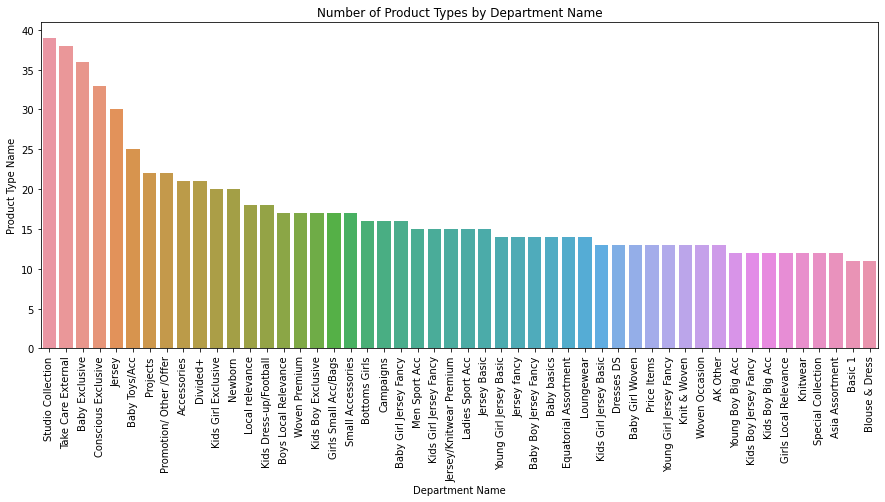

In [30]:
tpd = articles.groupby(['department_name'])['product_type_name'].nunique()
df_tpd = pd.DataFrame({'Department Name': tpd.index,
                   'Product Type Name': tpd.values
                  })
df_tpd = df_tpd.sort_values(['Product Type Name'], ascending=False)[:50]
plt.figure(figsize = (15,6))
plt.title('Number of Product Types by Department Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Department Name', y='Product Type Name', data=df_tpd)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [31]:
df_tpd

,Department Name,Product Type Name
190,Studio Collection,39
196,Take Care External,38
14,Baby Exclusive,36
44,Conscious Exclusive,33
81,Jersey,30
23,Baby Toys/Acc,25
155,Projects,22
161,Promotion/ Other /Offer,22
5,Accessories,21
52,Divided+,21


In [4]:
customers = pd.read_csv('customers.csv')
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [13]:
missing_data(customers)

,Total
Active,907576
FN,895050
fashion_news_frequency,16009
age,15861
club_member_status,6062
customer_id,0
postal_code,0


In [14]:
unique_values(customers)

,Total,Uniques
customer_id,1371980,1371980
FN,476930,1
Active,464404,1
club_member_status,1365918,3
fashion_news_frequency,1355971,4
age,1356119,84
postal_code,1371980,352899


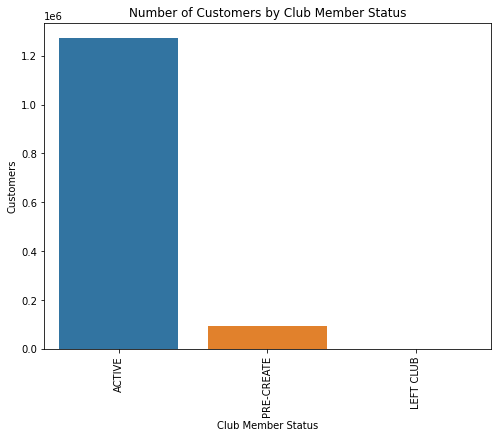

In [35]:
cps = customers.groupby(['club_member_status'])['customer_id'].nunique()
df_cps = pd.DataFrame({'Club Member Status': cps.index,
                   'Customers': cps.values
                  })
df_cps = df_cps.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Customers by Club Member Status')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Club Member Status', y='Customers', data=df_cps)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [36]:
df_cps

,Club Member Status,Customers
0,ACTIVE,1272491
2,PRE-CREATE,92960
1,LEFT CLUB,467


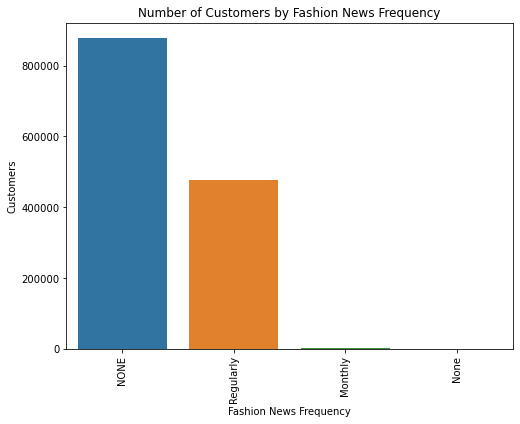

In [37]:
cpf = customers.groupby(['fashion_news_frequency'])['customer_id'].nunique()
df_cpf = pd.DataFrame({'Fashion News Frequency': cpf.index,
                   'Customers': cpf.values
                  })
df_cpf = df_cpf.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Customers by Fashion News Frequency')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Fashion News Frequency', y='Customers', data=df_cpf)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [38]:
df_cpf

,Fashion News Frequency,Customers
1,NONE,877711
3,Regularly,477416
0,Monthly,842
2,None,2


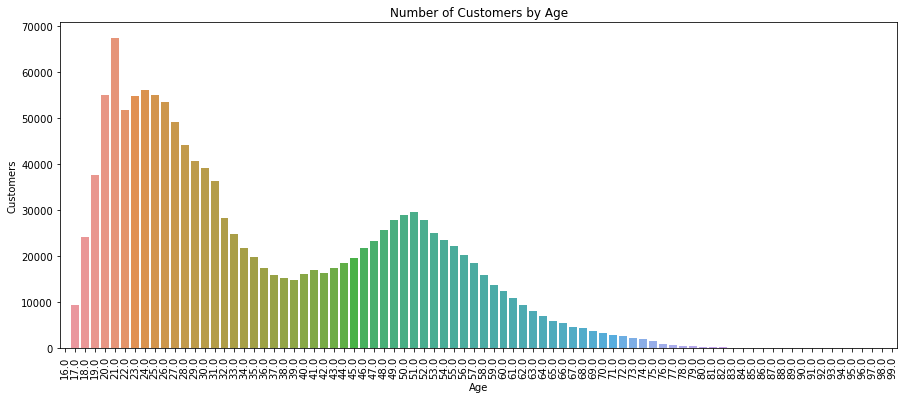

In [39]:
cpa = customers.groupby(['age'])['customer_id'].nunique()
df_cpa = pd.DataFrame({'Age': cpa.index,
                   'Customers': cpa.values
                  })
df_cpa = df_cpa.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (15,6))
plt.title('Number of Customers by Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y='Customers', data=df_cpa)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [40]:
df_cpa

,Age,Customers
5,21.0,67530
8,24.0,56124
4,20.0,55196
9,25.0,54989
7,23.0,54867
...,...,...
82,98.0,7
77,93.0,4
81,97.0,4
78,94.0,3


In [30]:
transactions = pd.read_csv('transactions_train.csv')
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [16]:
missing_data(transactions)

,Total
t_dat,0
customer_id,0
article_id,0
price,0
sales_channel_id,0


In [17]:
unique_values(transactions)

,Total,Uniques
t_dat,31788324,734
customer_id,31788324,1362281
article_id,31788324,104547
price,31788324,9857
sales_channel_id,31788324,2


In [34]:
trans = transactions

In [35]:
transactions['t_dat'] = transactions['t_dat'].astype("datetime64")
transactions_1w = trans.set_index('t_dat').last('7D')

In [36]:
transactions_1w

,customer_id,article_id,price,sales_channel_id
t_dat,,,,
2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,786022008,0.048441,2
2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,913272003,0.032288,2
2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,889669006,0.056508,2
2020-09-16,0010e8eb18f131e724d6997909af0808adbba057529edb...,237347060,0.033881,1
2020-09-16,0010e8eb18f131e724d6997909af0808adbba057529edb...,562245001,0.013542,1
...,...,...,...,...
2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1


In [49]:
df = transactions_1w.groupby('article_id')['customer_id'].count().reset_index()
df.columns = ['article_id', 'no_of_times_sold']
df = df.sort_values('no_of_times_sold', ascending = False)
df_20 = df[:20]

In [50]:
df_20

,article_id,no_of_times_sold
17308,924243001,852
17309,924243002,635
16961,918522001,609
17287,923758001,592
11827,866731001,552
16264,909370001,537
4496,751471001,526
16773,915529003,495
16774,915529005,491
430,448509014,490


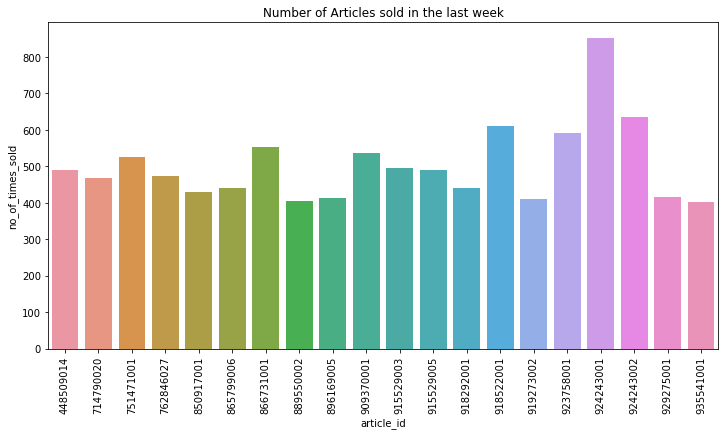

In [51]:

fig, ax = plt.subplots(1, 1, figsize=(12,6))


plt.title('Number of Articles sold in the last week')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'article_id', y='no_of_times_sold', data=df_20)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [56]:
df_20.join(articles[['article_id', 'product_type_name']].set_index('article_id'), on='article_id')

,article_id,no_of_times_sold,product_type_name
17308,924243001,852,Sweater
17309,924243002,635,Sweater
16961,918522001,609,Sweater
17287,923758001,592,Unknown
11827,866731001,552,Leggings/Tights
16264,909370001,537,Dress
4496,751471001,526,Trousers
16773,915529003,495,Sweater
16774,915529005,491,Sweater
430,448509014,490,Trousers


In [45]:
transactions['t_dat'] = transactions['t_dat'].astype("datetime64")
transactions_6 = trans.set_index('t_dat').last('6M')

In [46]:
transactions_3 = trans.set_index('t_dat').last('3M')

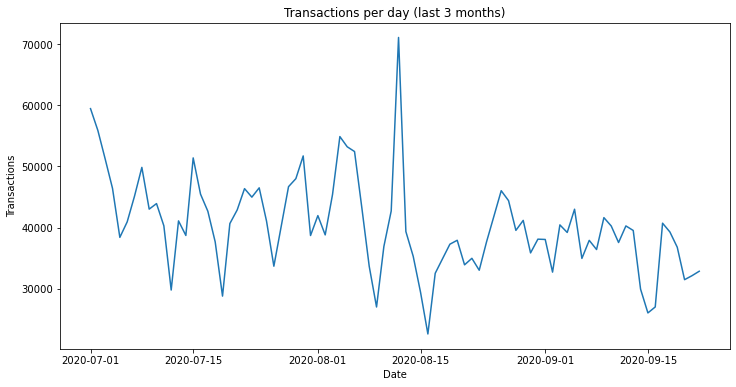

In [47]:
df = transactions_3.groupby(['t_dat'])['article_id'].count().reset_index()
df.columns = ['Date', 'Transactions']
fig, ax = plt.subplots(1, 1, figsize=(12,6))
plt.plot(df['Date'], df['Transactions'])
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Transactions per day (last 3 months)')
plt.show()

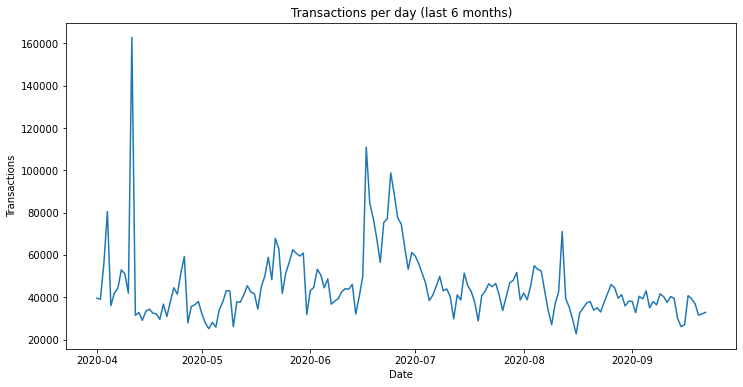

In [48]:
df = transactions_6.groupby(['t_dat'])['article_id'].count().reset_index()
df.columns = ['Date', 'Transactions']
fig, ax = plt.subplots(1, 1, figsize=(12,6))
plt.plot(df['Date'], df['Transactions'])
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Transactions per day (last 6 months)')
plt.show()

In [49]:
transactions_12 = trans.set_index('t_dat').last('12M')

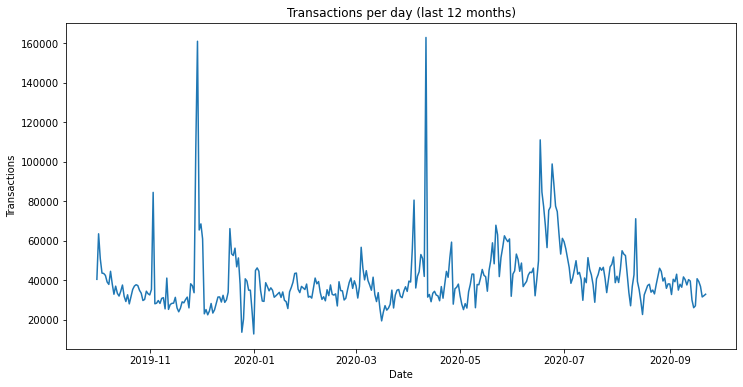

In [50]:
df = transactions_12.groupby(['t_dat'])['article_id'].count().reset_index()
df.columns = ['Date', 'Transactions']
fig, ax = plt.subplots(1, 1, figsize=(12,6))
plt.plot(df['Date'], df['Transactions'])
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Transactions per day (last 12 months)')
plt.show()

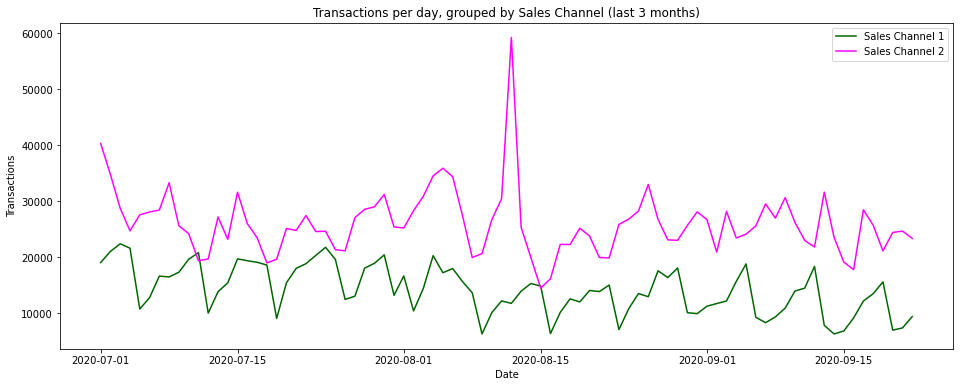

In [51]:
df = transactions_3.groupby(['t_dat', 'sales_channel_id'])['article_id'].count().reset_index()
df.columns = ['Date', 'Sales Channel Id', 'Transactions']
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df['Sales Channel Id']==1, 'Date'], df.loc[df['Sales Channel Id']==1, 'Transactions'], 
             label='Sales Channel 1', color="Darkgreen")
g2 = ax.plot(df.loc[df['Sales Channel Id']==2, 'Date'], df.loc[df['Sales Channel Id']==2, 'Transactions'], 
             label='Sales Channel 2', color="Magenta")
plt.xlabel('Date')
plt.ylabel('Transactions')
ax.legend()
plt.title('Transactions per day, grouped by Sales Channel (last 3 months)')
plt.show()

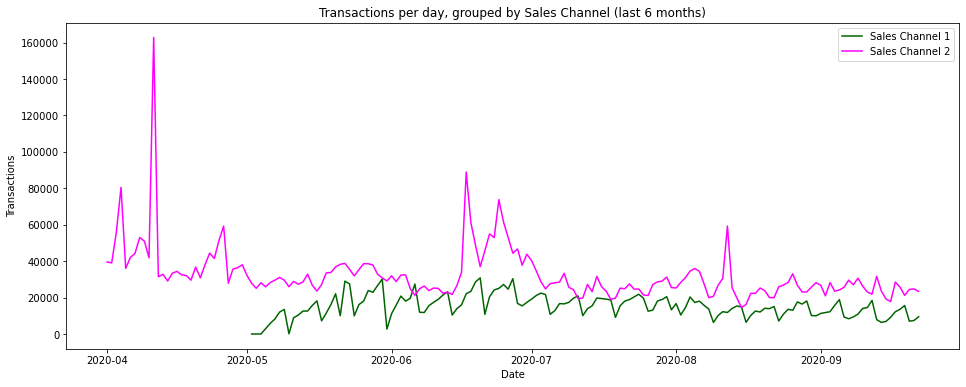

In [52]:
df = transactions_6.groupby(['t_dat', 'sales_channel_id'])['article_id'].count().reset_index()
df.columns = ['Date', 'Sales Channel Id', 'Transactions']
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df['Sales Channel Id']==1, 'Date'], df.loc[df['Sales Channel Id']==1, 'Transactions'], 
             label='Sales Channel 1', color="Darkgreen")
g2 = ax.plot(df.loc[df['Sales Channel Id']==2, 'Date'], df.loc[df['Sales Channel Id']==2, 'Transactions'], 
             label='Sales Channel 2', color="Magenta")
plt.xlabel('Date')
plt.ylabel('Transactions')
ax.legend()
plt.title('Transactions per day, grouped by Sales Channel (last 6 months)')
plt.show()

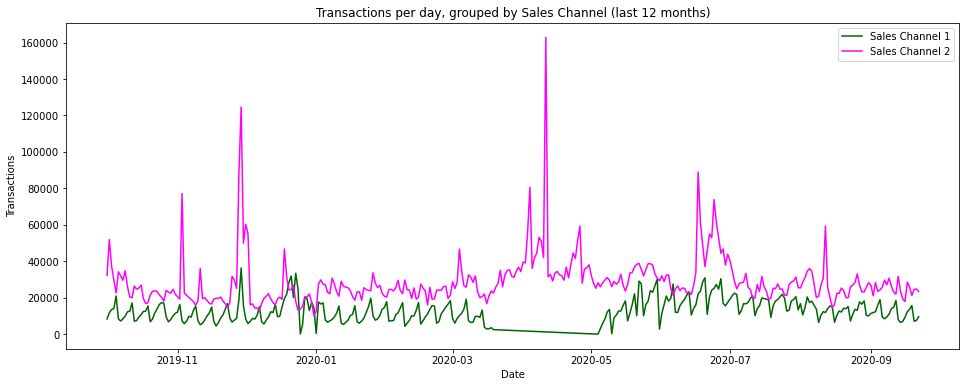

In [53]:
df = transactions_12.groupby(['t_dat', 'sales_channel_id'])['article_id'].count().reset_index()
df.columns = ['Date', 'Sales Channel Id', 'Transactions']
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df['Sales Channel Id']==1, 'Date'], df.loc[df['Sales Channel Id']==1, 'Transactions'], 
             label='Sales Channel 1', color="Darkgreen")
g2 = ax.plot(df.loc[df['Sales Channel Id']==2, 'Date'], df.loc[df['Sales Channel Id']==2, 'Transactions'], 
             label='Sales Channel 2', color="Magenta")
plt.xlabel('Date')
plt.ylabel('Transactions')
ax.legend()
plt.title('Transactions per day, grouped by Sales Channel (last 12 months)')
plt.show()

In [18]:
trans_df = transactions[['t_dat', 'customer_id', 'article_id', 'price']]

In [19]:
article_df = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'department_name', 
                       'index_group_name', 'section_name', 'garment_group_name', 'colour_group_name']]

In [20]:
merged_df = pd.merge(trans_df, article_df, on='article_id')
merged_df.head()

,t_dat,customer_id,article_id,price,prod_name,product_type_name,product_group_name,department_name,index_group_name,section_name,garment_group_name,colour_group_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Black
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Black
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Black
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Black
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Black


In [21]:
cust_df = customers[['customer_id', 'age']]

In [22]:
fin_merged_df = pd.merge(merged_df, cust_df, on='customer_id')
fin_merged_df.head()

,t_dat,customer_id,article_id,price,prod_name,product_type_name,product_group_name,department_name,index_group_name,section_name,garment_group_name,colour_group_name,age
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Black,24.0
1,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Black,24.0
2,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,Rae Push (Melbourne) 2p,Bra,Underwear,Casual Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Light Pink,24.0
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,Pluto OTS,Blouse,Garment Upper body,Blouse,Ladieswear,Womens Casual,Blouses,Light Blue,24.0
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002,0.022017,Lazer Razer Brief,Swimwear bottom,Swimwear,Swimwear,Ladieswear,"Womens Swimwear, beachwear",Swimwear,Black,24.0


In [23]:
total_sold = fin_merged_df['article_id'].value_counts().rename_axis('article_id').reset_index(name='Sold Quantity')
total_sold

,article_id,Sold Quantity
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329
...,...,...
104542,711823014,1
104543,556144001,1
104544,464679007,1
104545,647686001,1


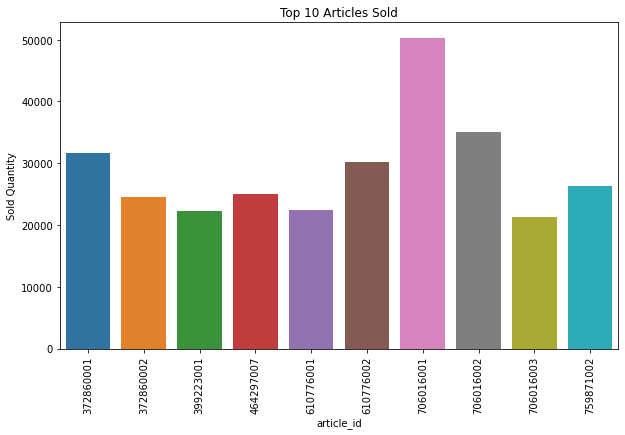

In [106]:
df_a = total_sold.iloc[:10]
plt.figure(figsize=(10,6))
#plt.plot(total_sold_prod_25['prod_name'], total_sold_prod_25['Sold Quantity'])
plt.title('Top 10 Articles Sold')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'article_id', y='Sold Quantity', data=df_a)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [33]:
total_folders = total_files = 0
folder_info = []
images_names = []
for base, dirs, files in (os.walk('C:/Users/baind/Dissertation/')):
    for directories in dirs:
        folder_info.append((directories, len(os.listdir(os.path.join(base, directories)))))
        total_folders += 1
    for _files in files:
        total_files += 1
        if len(_files.split(".jpg"))==2:
            images_names.append(_files.split(".jpg")[0])

In [35]:
images_names[0:3]

['0108775015', '0108775044', '0108775051']

In [44]:
image_name_df = pd.DataFrame(images_names, columns = ["image_name"])
image_name_df["article_id"] = image_name_df["image_name"].apply(lambda x: int(x[1:]))

In [45]:
image_name_df.head()

,image_name,article_id
0,0108775015,108775015
1,0108775044,108775044
2,0108775051,108775051
3,0110065001,110065001
4,0110065002,110065002


In [47]:
image_article_df = articles[["article_id", "product_code", "product_group_name", "product_type_name"]].merge(image_name_df, on=["article_id"], how="left")
print(image_article_df.shape)
image_article_df.head()

(105542, 5)


,article_id,product_code,product_group_name,product_type_name,image_name
0,108775015,108775,Garment Upper body,Vest top,0108775015
1,108775044,108775,Garment Upper body,Vest top,0108775044
2,108775051,108775,Garment Upper body,Vest top,0108775051
3,110065001,110065,Underwear,Bra,0110065001
4,110065002,110065,Underwear,Bra,0110065002


In [107]:
df_a.join(image_article_df[['article_id', 'product_group_name']].set_index('article_id'), 
          on='article_id', how='left')

,article_id,Sold Quantity,product_group_name
0,706016001,50287,Garment Lower body
1,706016002,35043,Garment Lower body
2,372860001,31718,Socks & Tights
3,610776002,30199,Garment Upper body
4,759871002,26329,Garment Upper body
5,464297007,25025,Underwear
6,372860002,24458,Socks & Tights
7,610776001,22451,Garment Upper body
8,399223001,22236,Garment Lower body
9,706016003,21241,Garment Lower body


In [102]:
from PIL import Image

def plot_image_samples(image_article_df, article_id, cols=1, rows=-1):
    image_path = "images/"
    _df = image_article_df.loc[image_article_df.article_id==article_id]
    #article_ids = _df.article_id.values[0:cols*rows]
    plt.figure(figsize=(2 + 3 * cols, 2 + 4 * rows))
    for i in range(cols * rows):
        article_id = ("0" + str(article_id))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(f"{article_id} {str(article_id)[:3]}\n{article_id}.jpg")
        image = Image.open(f"{image_path}{str(article_id[:3])}/{str(article_id)}.jpg")
        plt.imshow(image)

In [94]:
plt.subplot(2,4)
for i in df_a['image_name']:
    img = Image.open('images/'+str(i)[:3]+'/'+str(i)+'.jpg')
    img

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>

In [103]:
df_a

,article_id,Sold Quantity,product_group_name,image_name
0,706016001,50287,Garment Lower body,0706016001
1,706016002,35043,Garment Lower body,0706016002
2,372860001,31718,Socks & Tights,0372860001
3,610776002,30199,Garment Upper body,NaN
4,759871002,26329,Garment Upper body,0759871002
5,464297007,25025,Underwear,0464297007
6,372860002,24458,Socks & Tights,0372860002
7,610776001,22451,Garment Upper body,NaN
8,399223001,22236,Garment Lower body,0399223001
9,706016003,21241,Garment Lower body,0706016003


In [104]:
df_a = df_a.dropna()

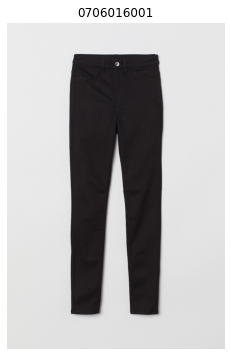

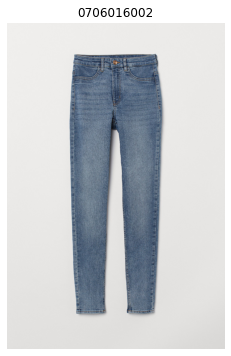

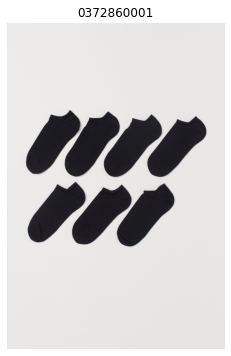

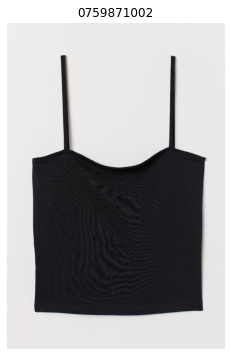

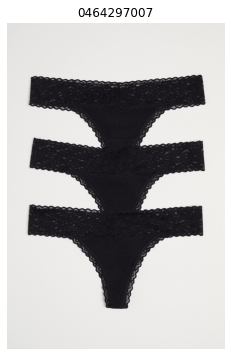

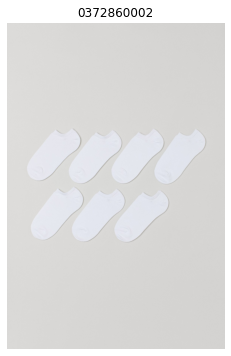

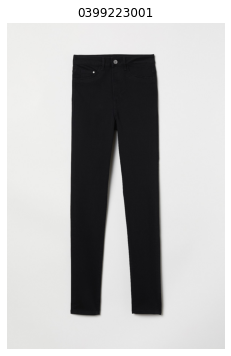

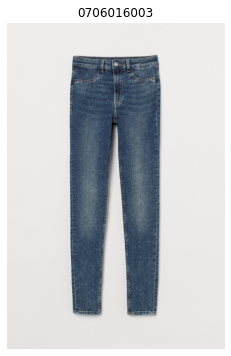

In [105]:
for i in df_a['image_name']:

    fig, ax = plt.subplots(1, 1, figsize=(20,6))
    img = Image.open('images/'+str(i)[:3]+'/'+str(i)+'.jpg')
    plt.axis('off')
    plt.title(i)
    plt.imshow(img)

In [63]:
prod_names = pd.merge(df_a, fin_merged_df[['article_id', 'prod_name', ]], left_on='article_id', 
                      right_on='article_id', how='left')
prod_names

,article_id,Sold Quantity,prod_name
0,706016001,50287,Jade HW Skinny Denim TRS
1,706016001,50287,Jade HW Skinny Denim TRS
2,706016001,50287,Jade HW Skinny Denim TRS
3,706016001,50287,Jade HW Skinny Denim TRS
4,706016001,50287,Jade HW Skinny Denim TRS
...,...,...,...
288982,706016003,21241,Jade HW Skinny Denim TRS
288983,706016003,21241,Jade HW Skinny Denim TRS
288984,706016003,21241,Jade HW Skinny Denim TRS
288985,706016003,21241,Jade HW Skinny Denim TRS


In [64]:
p = prod_names.groupby('prod_name').count()
p

,article_id,Sold Quantity
prod_name,,
7p Basic Shaftless,56176,56176
Curvy Jeggings HW Ankle,22236,22236
Greta Thong Mynta Low 3p,25025,25025
Jade HW Skinny Denim TRS,106571,106571
Tilda tank,26329,26329
Tilly (1),52650,52650


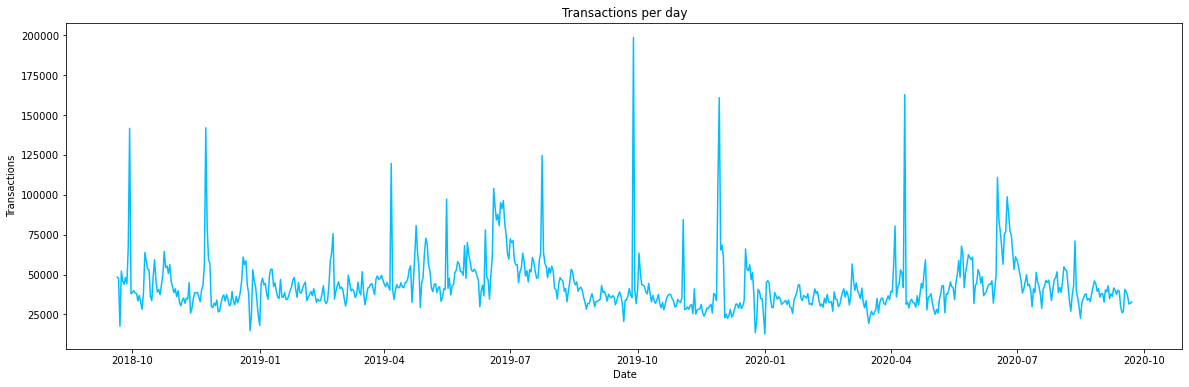

In [73]:
df_t = transactions.groupby(['t_dat'])['article_id'].count().reset_index()
df_t.columns = ['Date', 'Transactions']
fig, ax = plt.subplots(1, 1, figsize=(20,6))
plt.plot(df_t['Date'], df_t['Transactions'], color = 'Deepskyblue')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Transactions per day')
plt.show()

In [84]:
df_t.set_index('Date', inplace=True)

analysis = df_t[['Transactions']].copy()

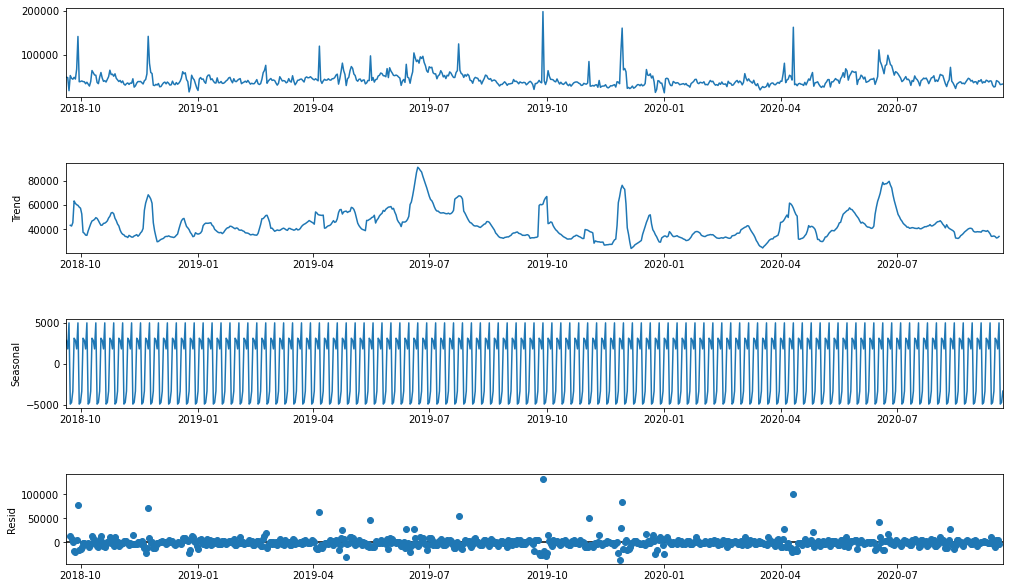

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(analysis, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

fig = decompose_result.plot()
fig.set_size_inches((16, 9))
plt.show()

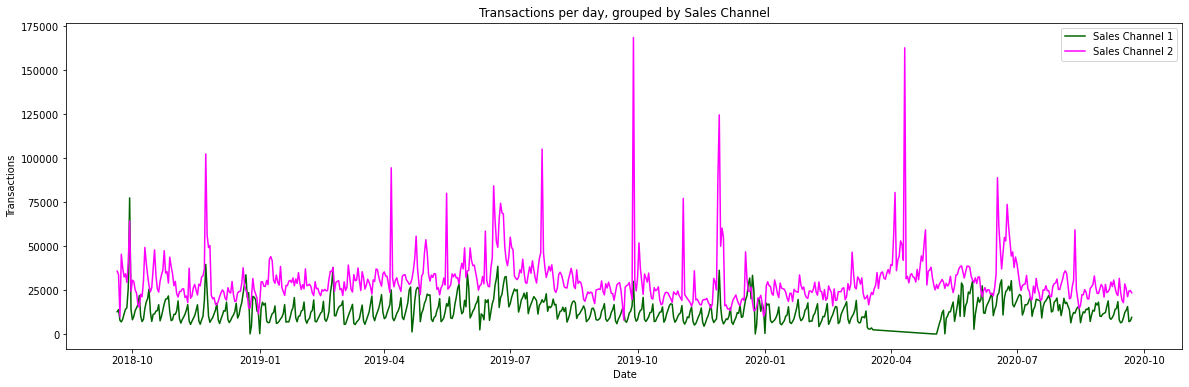

In [55]:
df = transactions.groupby(['t_dat', 'sales_channel_id'])['article_id'].count().reset_index()
df.columns = ['Date', 'Sales Channel Id', 'Transactions']
fig, ax = plt.subplots(1, 1, figsize=(20,6))
g1 = ax.plot(df.loc[df['Sales Channel Id']==1, 'Date'], df.loc[df['Sales Channel Id']==1, 'Transactions'], 
             label='Sales Channel 1', color="Darkgreen")
g2 = ax.plot(df.loc[df['Sales Channel Id']==2, 'Date'], df.loc[df['Sales Channel Id']==2, 'Transactions'], 
             label='Sales Channel 2', color="Magenta")
plt.xlabel('Date')
plt.ylabel('Transactions')
ax.legend()
plt.title('Transactions per day, grouped by Sales Channel')
plt.show()

In [56]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [65]:
ign = fin_merged_df['index_group_name'].unique().tolist()

In [75]:
cols = ['Darkgreen', 'DarkMagenta', 'DarkBlue', 'Coral', 'Deepskyblue']

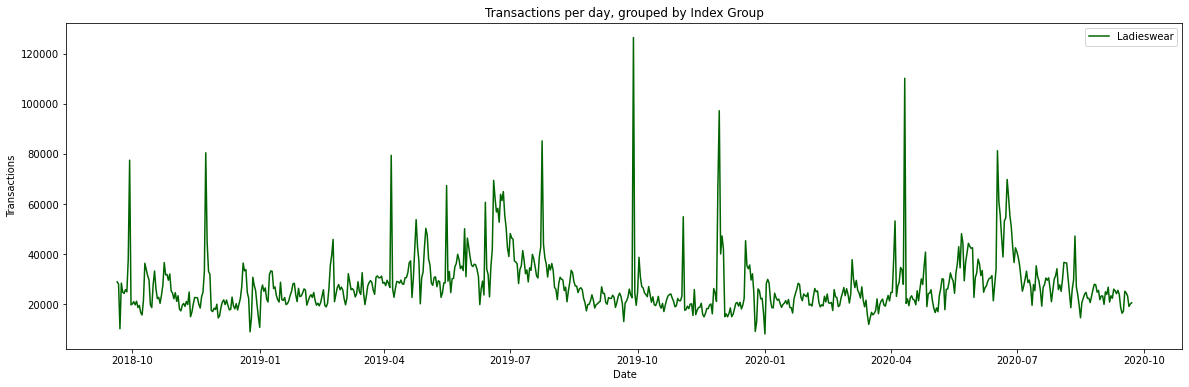

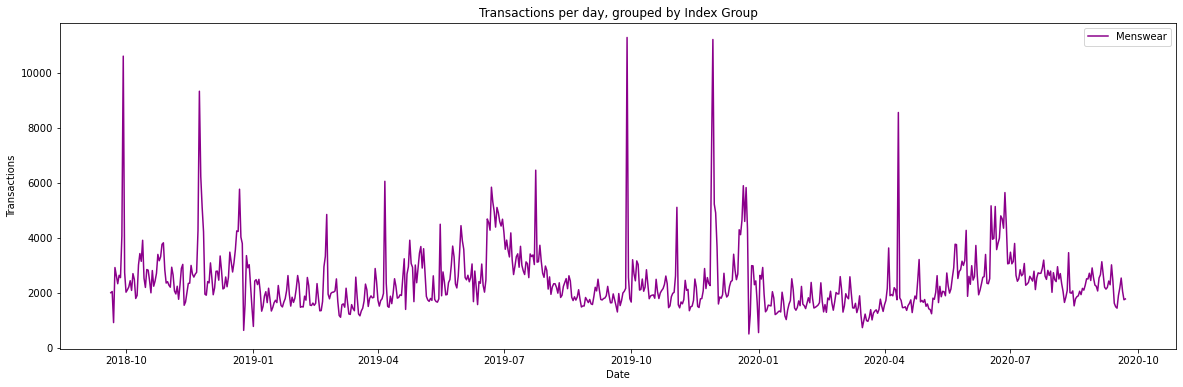

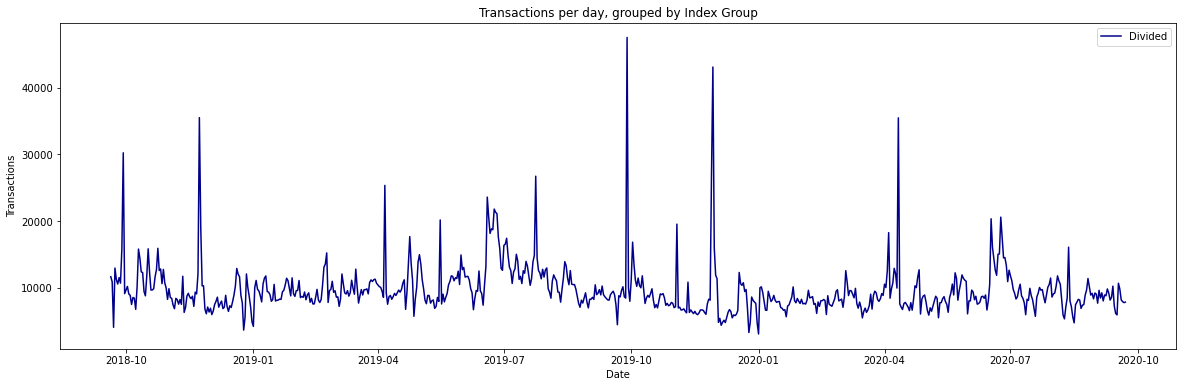

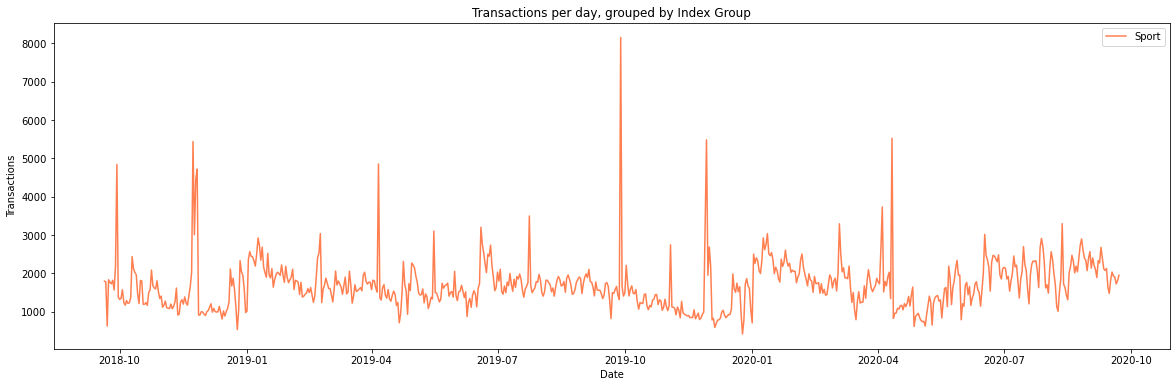

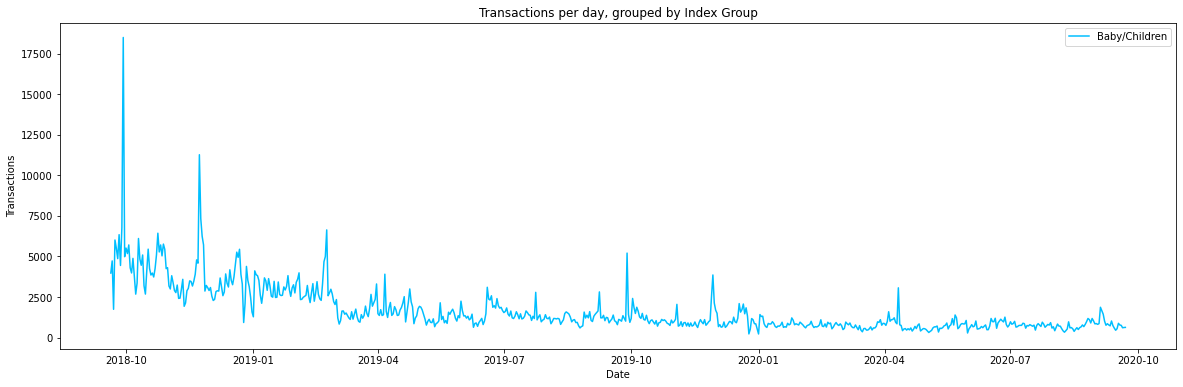

In [76]:
df = fin_merged_df.groupby(['t_dat', 'index_group_name'])['article_id'].count().reset_index()
df.columns = ['Date', 'Index Group Name', 'Transactions']

for i in ign:

    fig, ax = plt.subplots(1, 1, figsize=(20,6))
    g1 = ax.plot(df.loc[df['Index Group Name']==i, 'Date'], df.loc[df['Index Group Name']==i, 'Transactions'], 
                 label=i, color=cols[ign.index(i)])
    plt.xlabel('Date')
    plt.ylabel('Transactions')
    ax.legend()
    plt.title('Transactions per day, grouped by Index Group')
    plt.show()

In [ ]:
pcvn = fin_merged_df['perceived_colour_value_name'].unique().tolist()